https://www.kaggle.com/datasets/vizeno/earthquake-data-overview?resource=download

At the top of your notebook, make a markdown cell that summarizes your results. State:
- What features/columns had a relatively even or normal distribution? Which features/columns did not?
From the catagorical columns, the cities had a large distributuion, same with the countries. The continent that appeared most frequently was Africa. For the numerical columns, Latitude and Longitude had a very obsecure distribution. They were not even. The magnitude has a mostly even distribution with only one value being slightly higher.

- How did you handle missing values? Why did you do this method as opposed to others?
There were no nA values, however, there was an issue with the column lables. They included spaces so I had to remove these.

- How did you encode your categorical data? Why did you do this method as opposed to others?
I did one hot encoding for all my categorical columns because none of them had a natural order to them. Creating any order with these would cause bias and affect the data.


- How did you handle removing outliers? Why did you use this method as opposed to others?
Z-Score seemed to be the most effective method for latitude and longitude. I first tired using the IQR method but it was not specific enough for the data. Or at least, I believe that was the issue. The z-score allowed me to set a very specific threshold to ensure all outliers were removed.

- How did you normalize/standardize the data? Why did you use this method as opposed to others?
I used the standarization method. I felt like this worked best with my data and I was more comfortable with doing this process.


- How did each model perform? Which performed the best?
I chose to use LinearRegression, DecisionTreeRegressor, SVR, and Neural Network MLPRegressor. For each I used 3 metrics: R Squared, Root Mean Squared Error, and Mean Absolute Error for Regression. I think the Neural Network performed the best.

SVR Model:
Mean Absolute Error= 1.0417990425737358
Root Mean Squared Error = 1.0380222738892726
r Squared = -0.22835160270515553

Decision Tree Regressor:
Mean Absolute Error= 0.9420800544585787
Root Mean Squared Error = 1.1145784434762254
r Squared = -0.004454819838797697

Neural Network MLP Regressor:
Mean Absolute Error= 0.9269893305043098
Root Mean Squared Error = 1.0473142989588022
r Squared = 0.02746719444812007


- Did any models seem to have a relatively high amount of bias (underfitting)? Variance (overfitting)?
They all showed some bias. The SVR and Decision Tree had negative r-squared value went tested; therefore, it is underfitting the data. There was also high variance in the Decision Tree. The values from the train set and test set were very far off. Lastly, in regards to bias the nerual network did not do as well as the decision tree, but it also did not do as bad as the SVR model. It showed slight underfitting.



In [440]:
#import libararies
import pandas as pd
import matplotlib.pyplot as plt

In [441]:
rawDF = pd.read_csv("earthquake_dataset.csv")
rawDF.head()

,Place,Latitude,Longitude,Country,Continent,Magnitude
0,Bamako,12.6354,-8.0023,Mali,Africa,4.7
1,Niamey,13.5130,2.1151,Niger,Africa,5.7
2,Southern Chile,-39.8234,-73.0691,Chile,South America,4.9
3,Freetown,8.4815,-13.2315,Sierra Leone,Africa,4.8
4,Bamako,12.6422,-7.9990,Mali,Africa,5.3


In [442]:
rawDF.describe()

,Latitude,Longitude,Magnitude
count,1265.000000,1265.000000,1265.000000
mean,10.407495,0.625637,5.013992
std,27.817623,68.043305,0.389582
min,-77.869500,-175.207500,4.000000
25%,5.361100,-45.591900,4.700000
50%,12.638000,-7.998000,4.800000
75%,29.653000,31.235300,5.300000
max,56.843900,178.453500,6.100000


In [443]:
for col in rawDF:
        naCount = rawDF[col].isna().sum()
        print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the Place col is 0
The number of na values in the  Latitude col is 0
The number of na values in the  Longitude col is 0
The number of na values in the  Country col is 0
The number of na values in the  Continent col is 0
The number of na values in the  Magnitude col is 0


In [444]:
categorical_col = ["Place", "Country", "Continent"]
numerical_col = ["Latitude", "Longitude", "Magnitude"]

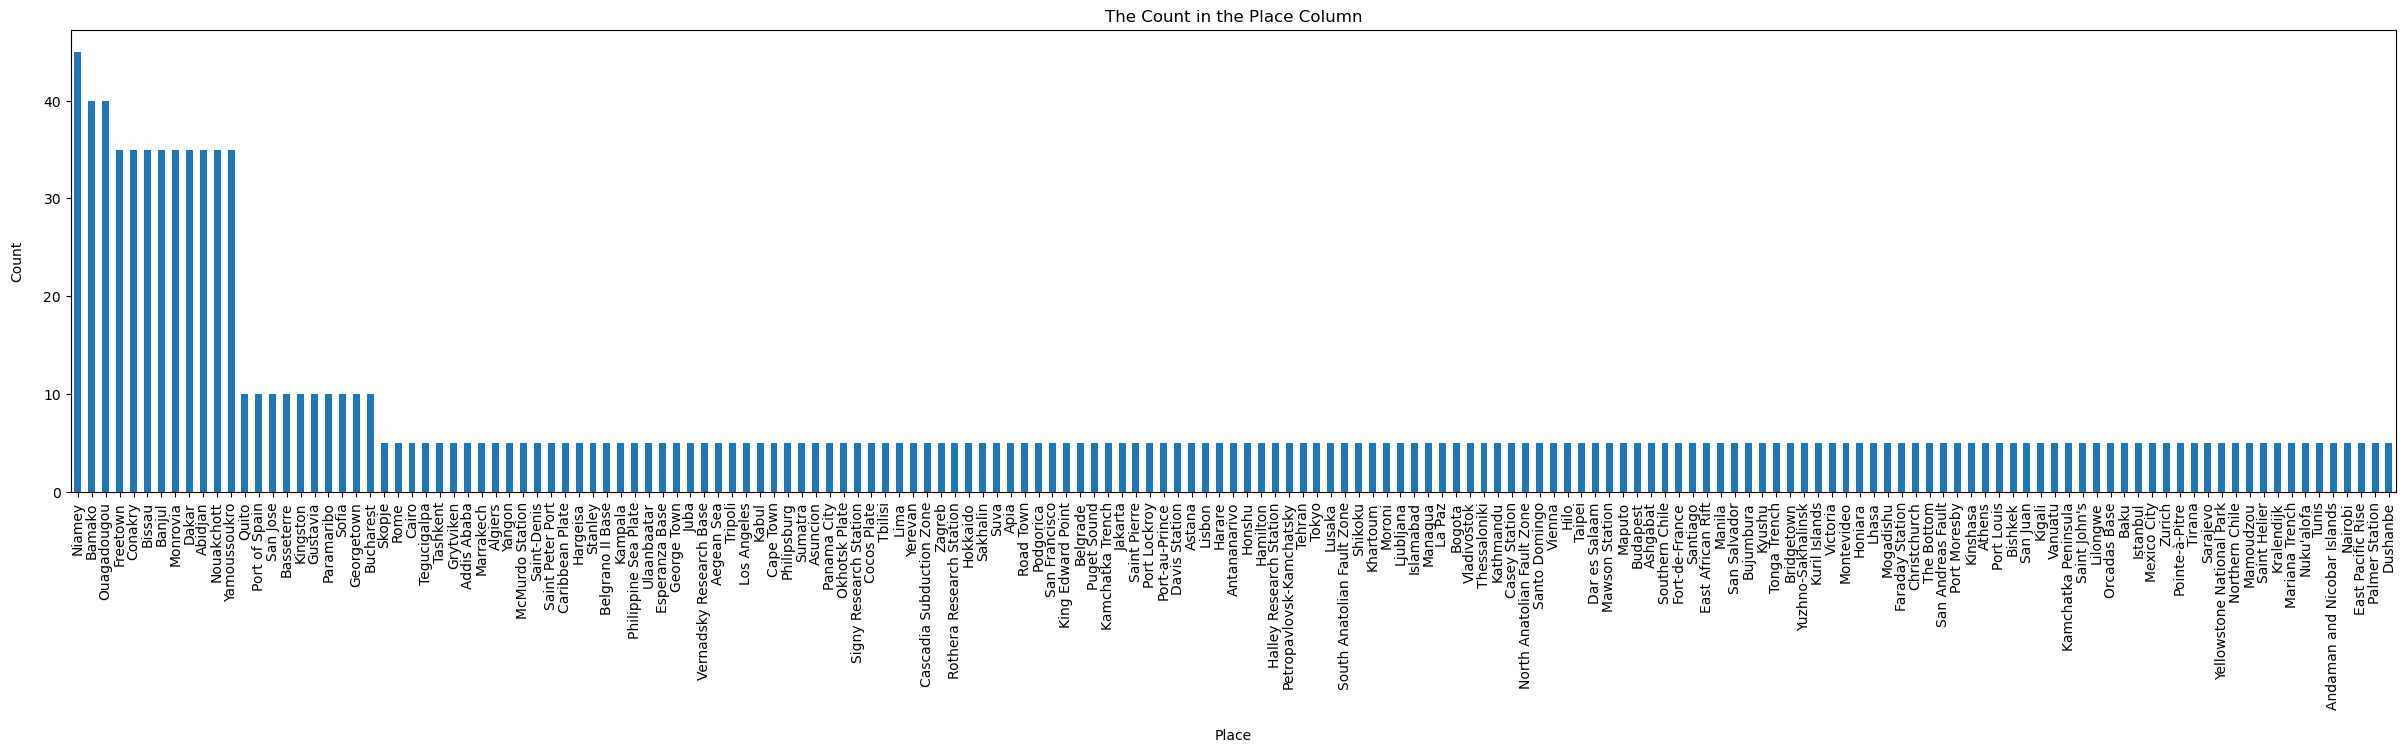

In [445]:
def makeBarValueCount(aDF, colName):
    aDF[colName].value_counts().plot(kind='bar', figsize=(30, 6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"The Count in the {colName} Column")
    
makeBarValueCount(rawDF, "Place")

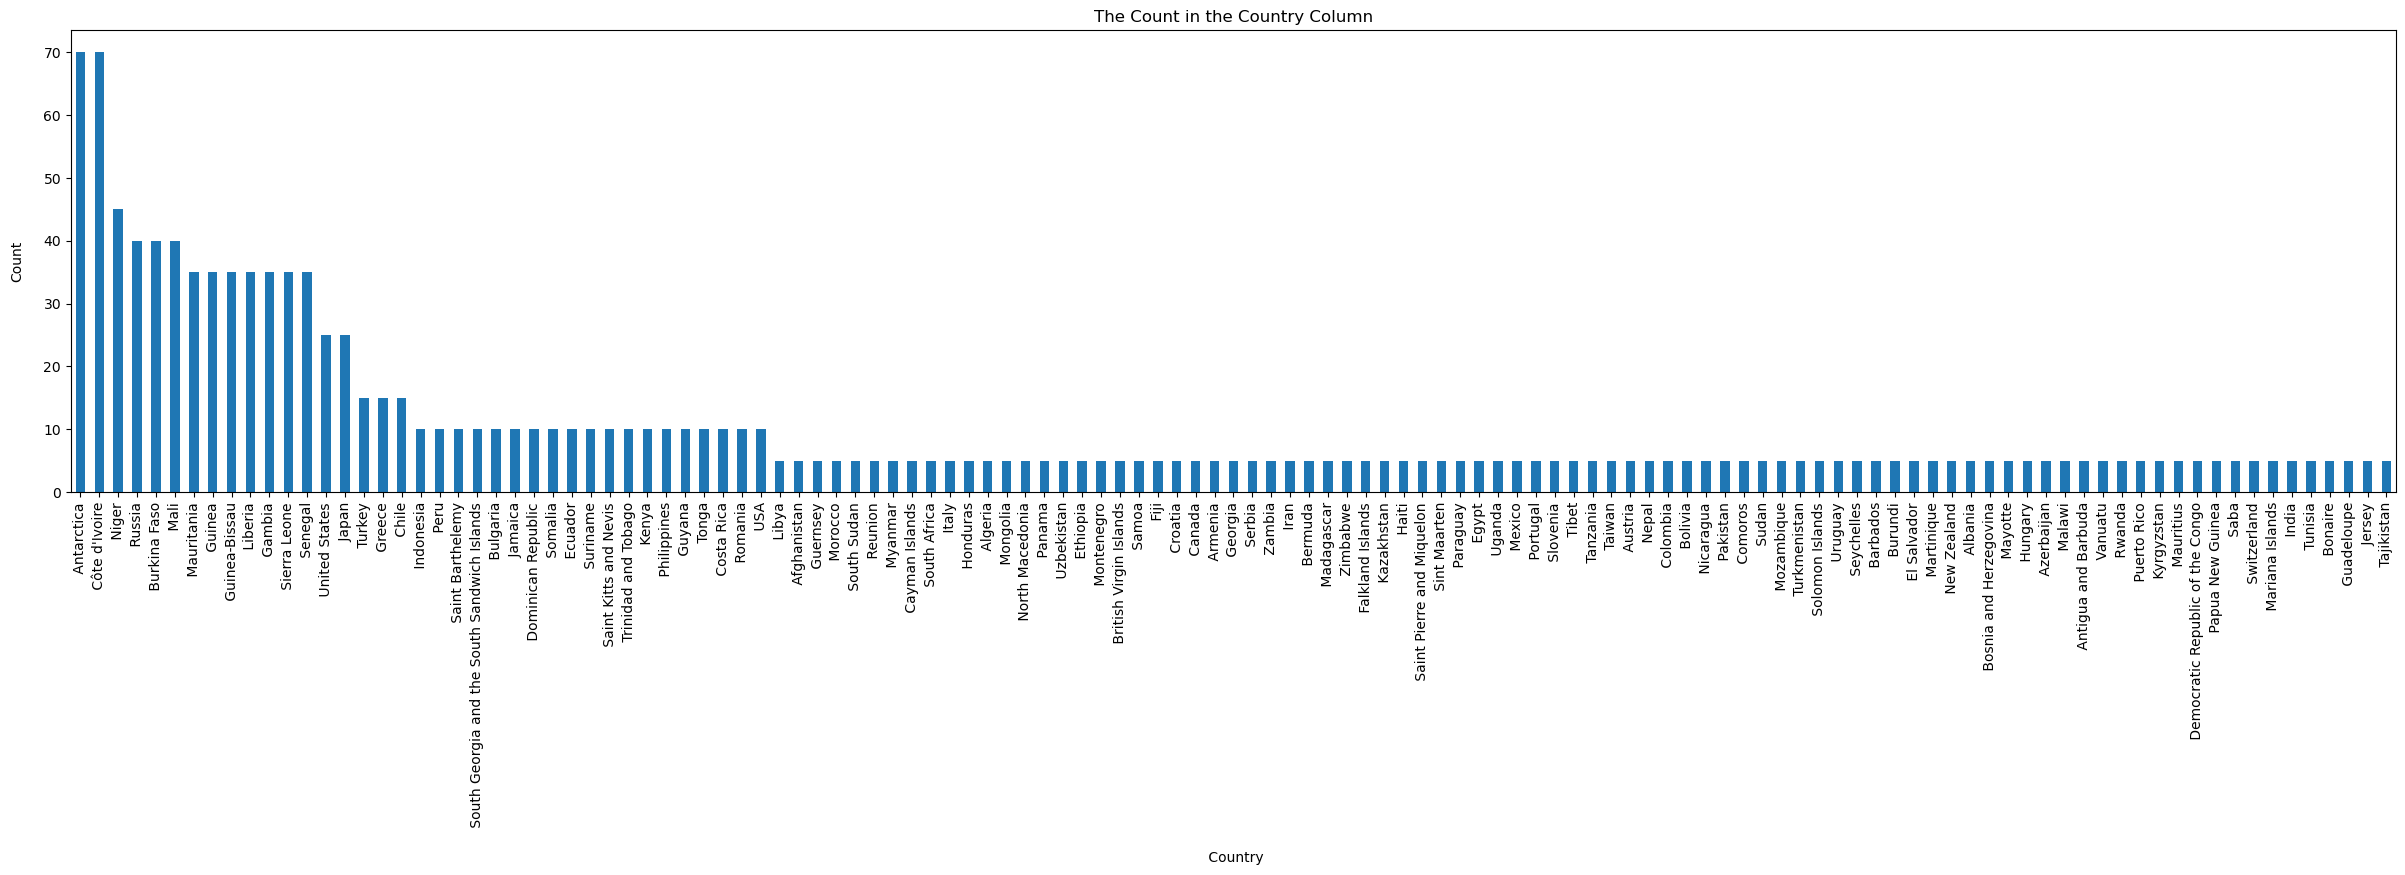

In [446]:
def makeBarValueCount(aDF, colName):
    aDF[colName].value_counts().plot(kind='bar', figsize=(30,6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"The Count in the{colName} Column")

makeBarValueCount(rawDF, " Country")

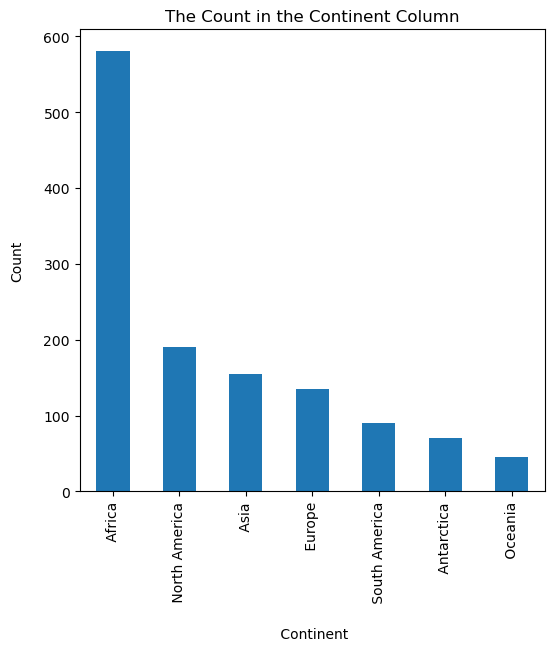

In [447]:
def makeBarValueCount(aDF, colName):
    aDF[colName].value_counts().plot(kind='bar', figsize=(6, 6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"The Count in the{colName} Column")
    
makeBarValueCount(rawDF, " Continent")

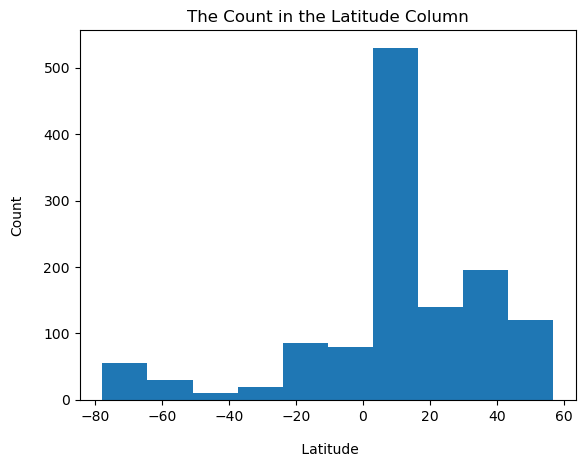

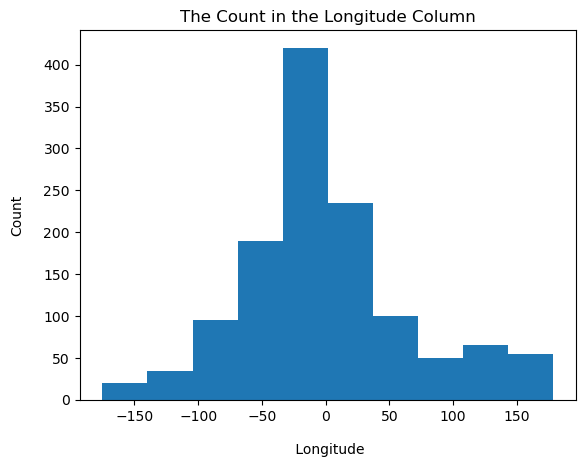

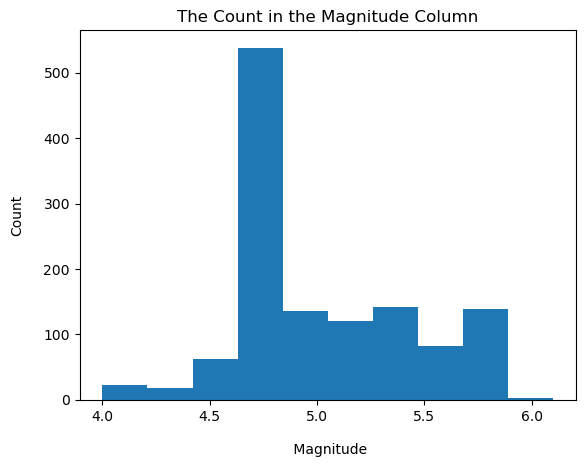

In [448]:
def makeHistValueCount(aDF, colName, figsize=(7, 6)):
    plt.hist(aDF[colName])
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"The Count in the{colName} Column")
    plt.show()

makeHistValueCount(rawDF, " Latitude")
makeHistValueCount(rawDF, " Longitude")
makeHistValueCount(rawDF, " Magnitude")

In [449]:
# def getLabelList(n):
#     labelList =[]
#     for i in range(n):
#         labelList.append(i)
#     return labelList

In [450]:
# continentList = [" Africa", "North America", " Asia", " Europe", 
#             " South America", " Antartica", " Oceania"]
# rawDF[" Continent"] = rawDF[" Continent"].replace(continentList, getLabelList(len(continentList)))

In [451]:
rawDF.head()

,Place,Latitude,Longitude,Country,Continent,Magnitude
0,Bamako,12.6354,-8.0023,Mali,Africa,4.7
1,Niamey,13.5130,2.1151,Niger,Africa,5.7
2,Southern Chile,-39.8234,-73.0691,Chile,South America,4.9
3,Freetown,8.4815,-13.2315,Sierra Leone,Africa,4.8
4,Bamako,12.6422,-7.9990,Mali,Africa,5.3


In [452]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
placeEncoder = OneHotEncoder(sparse=False)
countryEncoder = OneHotEncoder(sparse=False)
continentEncoder = OneHotEncoder(sparse=False)

#perform one-hot encoding on 'Decibel_Level' column 
placeEncodedData = placeEncoder.fit_transform(rawDF[['Place']])
countryEncodedData = countryEncoder.fit_transform(rawDF[[' Country']])
continentEncodedData = continentEncoder.fit_transform(rawDF[[' Continent']])


placeEncoder.categories_
countryEncoder.categories_
continentEncoder.categories_

c:\Users\baile\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\baile\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\baile\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array([' Africa', ' Antarctica', ' Asia', ' Europe', ' North America',
        ' Oceania', ' South America'], dtype=object)]

In [453]:
placeOneHotDF = pd.DataFrame(placeEncodedData, columns=placeEncoder.categories_)
countryOneHotDF = pd.DataFrame(countryEncodedData, columns=countryEncoder.categories_)
continentOneHotDF = pd.DataFrame(continentEncodedData, columns=continentEncoder.categories_)

placeOneHotDF.head()

,Abidjan,Addis Ababa,Aegean Sea,Algiers,Andaman and Nicobar Islands,Antananarivo,Apia,Ashgabat,Astana,Asuncion,...,Victoria,Vienna,Vladivostok,Yamoussoukro,Yangon,Yellowstone National Park,Yerevan,Yuzhno-Sakhalinsk,Zagreb,Zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [454]:
cleanedDF = pd.concat([rawDF, placeOneHotDF], axis=1).drop(columns = ["Place"])
cleanedDF = pd.concat([rawDF, countryOneHotDF], axis=1).drop(columns = [" Country"])
cleanedDF = pd.concat([rawDF, continentOneHotDF], axis=1).drop(columns = [" Continent"])

cleanedDF.head()

,Place,Latitude,Longitude,Country,Magnitude,"( Africa,)","( Antarctica,)","( Asia,)","( Europe,)","( North America,)","( Oceania,)","( South America,)"
0,Bamako,12.6354,-8.0023,Mali,4.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Niamey,13.5130,2.1151,Niger,5.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Southern Chile,-39.8234,-73.0691,Chile,4.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Freetown,8.4815,-13.2315,Sierra Leone,4.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bamako,12.6422,-7.9990,Mali,5.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [455]:
placeOneHotDF.columns = placeOneHotDF.columns.get_level_values(0)
countryOneHotDF.columns = countryOneHotDF.columns.get_level_values(0)
continentOneHotDF.columns = continentOneHotDF.columns.get_level_values(0)

In [456]:
cleanedDF.head()

,Place,Latitude,Longitude,Country,Magnitude,"( Africa,)","( Antarctica,)","( Asia,)","( Europe,)","( North America,)","( Oceania,)","( South America,)"
0,Bamako,12.6354,-8.0023,Mali,4.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Niamey,13.5130,2.1151,Niger,5.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Southern Chile,-39.8234,-73.0691,Chile,4.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Freetown,8.4815,-13.2315,Sierra Leone,4.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bamako,12.6422,-7.9990,Mali,5.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Box Plot of Latitude')

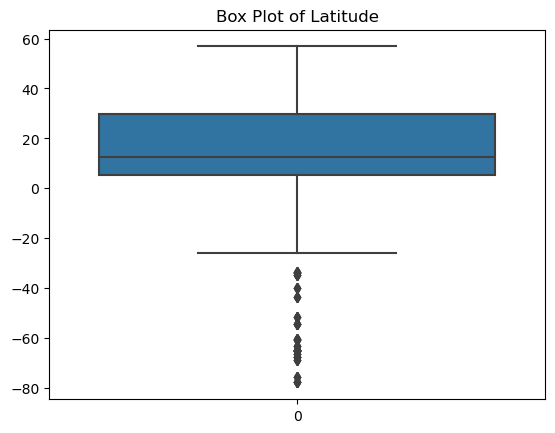

In [457]:
import seaborn as sns
sns.boxplot(cleanedDF[' Latitude'])
plt.title("Box Plot of Latitude")

Text(0.5, 1.0, 'Box Plot of Longitude')

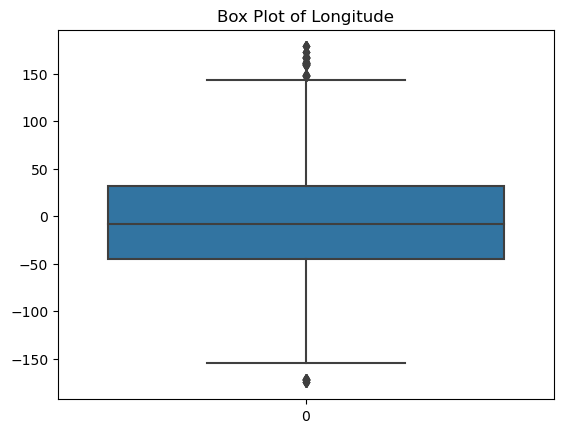

In [458]:
sns.boxplot(cleanedDF[' Longitude'])
plt.title("Box Plot of Longitude")

Text(0.5, 1.0, 'Box Plot of Magnitude')

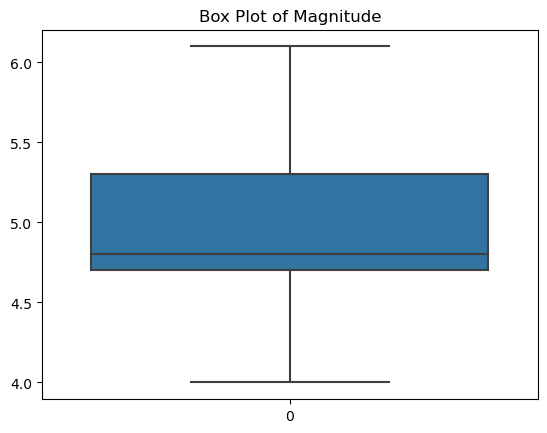

In [459]:
sns.boxplot(cleanedDF[' Magnitude'])
plt.title("Box Plot of Magnitude")

In [460]:
print(cleanedDF.shape)

(1265, 12)


In [461]:
#Removing Outliers in Latitude Data
import numpy as np
from scipy import stats
z = np.abs(stats.zscore(cleanedDF[' Latitude']))
print(z)

0       0.080121
1       0.111682
2       1.806436
3       0.069264
4       0.080366
          ...   
1260    0.109409
1261    0.154082
1262    0.129023
1263    0.109517
1264    0.181503
Name:  Latitude, Length: 1265, dtype: float64


In [462]:
# lets set a threshold

zThreshold = 0.5 
outlierIndices = np.where(z > zThreshold)[0]
zCleanedDF = cleanedDF.drop(outlierIndices)
print("Original DataFrame Shape:", cleanedDF.shape)
print("DataFrame Shape after Removing Outliers:", zCleanedDF.shape)

zCleanedDF.tail()

Original DataFrame Shape: (1265, 12)
DataFrame Shape after Removing Outliers: (700, 12)


,Place,Latitude,Longitude,Country,Magnitude,"( Africa,)","( Antarctica,)","( Asia,)","( Europe,)","( North America,)","( Oceania,)","( South America,)"
1260,Banjul,13.4498,-16.5883,Gambia,4.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1261,Dakar,14.6920,-17.4459,Senegal,4.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1262,Yamoussoukro,6.8198,-5.2756,Côte d'Ivoire,4.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1263,Banjul,13.4528,-16.5874,Gambia,4.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1264,Abidjan,5.3605,-4.0111,Côte d'Ivoire,5.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [463]:
#Removing Outliers in Longitude Data
import numpy as np
from scipy import stats
z = np.abs(stats.zscore(cleanedDF[' Longitude']))
print(z)

# lets set a threshold

zThreshold = 0.5 
outlierIndices = np.where(z > zThreshold)[0]
zCleanedDF = cleanedDF.drop(outlierIndices)
print("Original DataFrame Shape:", cleanedDF.shape)
print("DataFrame Shape after Removing Outliers:", zCleanedDF.shape)

zCleanedDF.tail()

0       0.126851
1       0.021899
2       1.083485
3       0.203732
4       0.126802
          ...   
1260    0.253085
1261    0.265694
1262    0.086762
1263    0.253072
1264    0.068171
Name:  Longitude, Length: 1265, dtype: float64
Original DataFrame Shape: (1265, 12)
DataFrame Shape after Removing Outliers: (640, 12)


,Place,Latitude,Longitude,Country,Magnitude,"( Africa,)","( Antarctica,)","( Asia,)","( Europe,)","( North America,)","( Oceania,)","( South America,)"
1260,Banjul,13.4498,-16.5883,Gambia,4.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1261,Dakar,14.6920,-17.4459,Senegal,4.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1262,Yamoussoukro,6.8198,-5.2756,Côte d'Ivoire,4.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1263,Banjul,13.4528,-16.5874,Gambia,4.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1264,Abidjan,5.3605,-4.0111,Côte d'Ivoire,5.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Box Plot of Longitude')

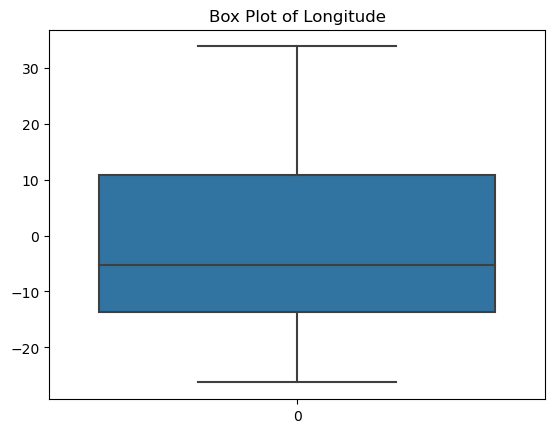

In [464]:
import seaborn as sns
sns.boxplot(zCleanedDF[' Longitude'])
plt.title("Box Plot of Longitude")

Text(0.5, 1.0, 'Box Plot of Longitude')

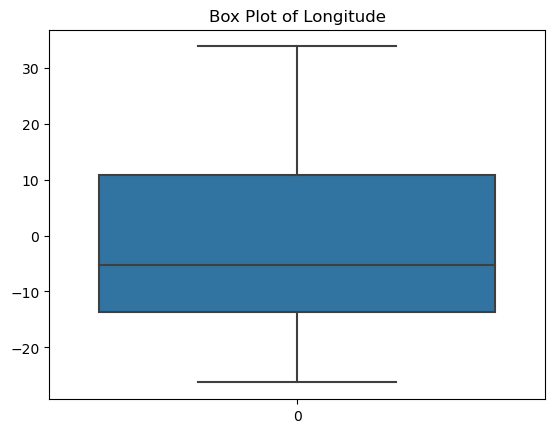

In [465]:
import seaborn as sns
sns.boxplot(zCleanedDF[' Longitude'])
plt.title("Box Plot of Longitude")

In [466]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# initialize the DF
StandardizedDF = zCleanedDF

StandardizedDF[[" Latitude", " Longitude", " Magnitude"]] = scaler.fit_transform(zCleanedDF[[" Latitude", " Longitude", " Magnitude"]])

StandardizedDF.head()

,Place,Latitude,Longitude,Country,Magnitude,"( Africa,)","( Antarctica,)","( Asia,)","( Europe,)","( North America,)","( Oceania,)","( South America,)"
0,Bamako,-0.160077,-0.451273,Mali,-0.841624,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Niamey,-0.110037,0.183593,Niger,1.776943,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Freetown,-0.396928,-0.779405,Sierra Leone,-0.579767,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bamako,-0.159689,-0.451066,Mali,0.729516,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Freetown,-0.396791,-0.779486,Sierra Leone,-0.579767,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [467]:
xDF = StandardizedDF[[" Latitude", " Longitude"]]
xDF.head()

,Latitude,Longitude
0,-0.160077,-0.451273
1,-0.110037,0.183593
3,-0.396928,-0.779405
4,-0.159689,-0.451066
10,-0.396791,-0.779486


In [468]:
yDF = StandardizedDF[" Magnitude"]

yDF.head()

0    -0.841624
1     1.776943
3    -0.579767
4     0.729516
10   -0.579767
Name:  Magnitude, dtype: float64

In [469]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

xTrain, xTest, yTrain, yTest = train_test_split(xDF, 
                                                yDF, 
                                                test_size=0.33)

model = LinearRegression().fit(xTrain, yTrain)

In [470]:
#THIS IS MODEL 1, USING R SQUARED METRIC
from sklearn.svm import SVR
from sklearn.metrics import r2_score

svrModel = SVR().fit(xTrain,yTrain)
preds = svrModel.predict(xTest)

mean_sq_error = mean_squared_error(yTest, preds, squared= False)
mean_abs_per_error = mean_absolute_percentage_error(yTest, preds)
r_squared = r2_score(yTest, preds)

print(mean_sq_error)
print(mean_abs_per_error)
print(r_squared)

1.0343089669378684
0.9151640713740852
-0.16131977350095617


In [471]:
#THIS IS MODEL 2, USING MEAN SQUARED ERROR
from sklearn.tree import DecisionTreeRegressor

dtModel = DecisionTreeRegressor()
dtModel.fit(xTrain, yTrain)

preds = dtModel.predict(xTest)

mean_sq_error = mean_squared_error(yTest, preds, squared= False)
mean_abs_per_error = mean_absolute_percentage_error(yTest, preds)
r_squared = r2_score(yTest, preds)

print(mean_sq_error)
print(mean_abs_per_error)
print(r_squared)

0.8466046189699394
0.79093571297229
0.22194104007949644


In [472]:
#THIS IS MODEL 3, USING MEAN ABSOLUTE REGRESSION
from sklearn.neural_network import MLPRegressor

# Define and train the MLPRegressor model
nnModel = MLPRegressor().fit(xTrain, yTrain)

preds = nnModel.predict(xTest)

mean_sq_error = mean_squared_error(yTest, preds, squared= False)
mean_abs_per_error = mean_absolute_percentage_error(yTest, preds)
r_squared = r2_score(yTest, preds)

print(mean_sq_error)
print(mean_abs_per_error)
print(r_squared)

0.9765843992147615
1.1054953738963331
-0.035310945619373424


The next cells are testing for bias.

In [479]:
trainPred = svrModel.predict(xTrain)
r2TrainScore = r2_score(yTrain, trainPred)
meansqerrorTrainScore = mean_squared_error(yTrain, trainPred) 
meanabspererrorTrainScore = mean_absolute_percentage_error(yTrain, trainPred) 

print(r2TrainScore)
print(meansqerrorTrainScore)
print(meanabspererrorTrainScore)

-0.21114103649410354
1.2525702071613352
0.9369434292716442


In [481]:
trainPred = dtModel.predict(xTrain)
r2TrainScore = r2_score(yTrain, trainPred)
meansqerrorTrainScore = mean_squared_error(yTrain, trainPred) 
meanabspererrorTrainScore = mean_absolute_percentage_error(yTrain, trainPred) 

print(r2TrainScore)
print(meansqerrorTrainScore)
print(meanabspererrorTrainScore)

0.9920996483786146
0.008170596791676175
0.01579838116444537


In [480]:
trainPred = nnModel.predict(xTrain)
r2TrainScore = r2_score(yTrain, trainPred)
meansqerrorTrainScore = mean_squared_error(yTrain, trainPred) 
meanabspererrorTrainScore = mean_absolute_percentage_error(yTrain, trainPred) 

print(r2TrainScore)
print(meansqerrorTrainScore)
print(meanabspererrorTrainScore)

0.02791443737037902
1.0053374279895066
1.1009185576100606


The next cells are testing for variance.

In [484]:
testPred = svrModel.predict(xTest)
r2TestScore = r2_score(yTest, testPred)
meansqerrorTrainScore = mean_squared_error(yTest, testPred) 
meanabspererrorTrainScore = mean_absolute_percentage_error(yTest, testPred) 

print(r2TrainScore)
print(meansqerrorTrainScore)
print(meanabspererrorTrainScore)

0.9920996483786146
1.0697950390880806
0.9151640713740852


In [485]:
testPred = dtModel.predict(xTest)
r2TestScore = r2_score(yTest, testPred)
meansqerrorTrainScore = mean_squared_error(yTest, testPred) 
meanabspererrorTrainScore = mean_absolute_percentage_error(yTest, testPred) 

print(r2TrainScore)
print(meansqerrorTrainScore)
print(meanabspererrorTrainScore)

0.9920996483786146
0.7167393808612363
0.79093571297229


In [486]:
testPred = nnModel.predict(xTest)
r2TestScore = r2_score(yTest, testPred)
meansqerrorTrainScore = mean_squared_error(yTest, testPred) 
meanabspererrorTrainScore = mean_absolute_percentage_error(yTest, testPred) 

print(r2TrainScore)
print(meansqerrorTrainScore)
print(meanabspererrorTrainScore)

0.9920996483786146
0.9537170887896567
1.1054953738963331
